### GAN MINST

In [1]:
import math 
import matplotlib.pyplot as plt

import torch
from torch import nn

import torchvision
import torchvision.transforms as transforms

from IPython.display import clear_output

from ganpy import GAN 

device = ""
if torch.cuda.is_available():
    print("Using GPU with CUDA")
    device = torch.device("cuda")
else:
    print("Using CPU")
    device = torch.device("cpu")

C:\Users\Walas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using GPU with CUDA


#### Seed and dataset


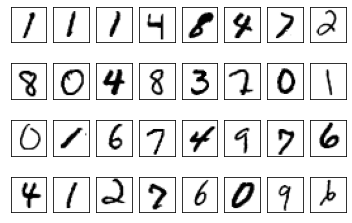

In [2]:
torch.manual_seed(111)

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

real_samples, mnist_labels = next(iter(train_loader))

for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])


### Discriminator

In [3]:
class DiscriminatorMINST(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784,1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,1),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        x = x.view(x.size(0), 784) # vectorize
        output = self.model(x)
        return output

discMINST = DiscriminatorMINST().to(device=device) # to(device=device) - sends to gpu or cpu 

### Generator


In [4]:
class GeneratorMINST(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100,256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024,784),
            nn.Tanh() # to make output in range of -1 to 1
        )
    
    def forward(self,x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28) # change vector to matrix
        return output

genMINST = GeneratorMINST().to(device=device) # to(device=device) - sends to gpu or cpu

# Prepare GAN

In [5]:

gan = GAN(discMINST,genMINST,device=device)


### Training
---



load discriminator: True
load generator: True


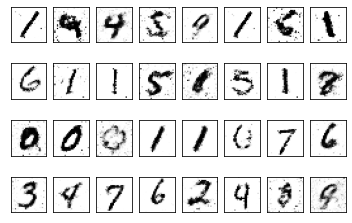

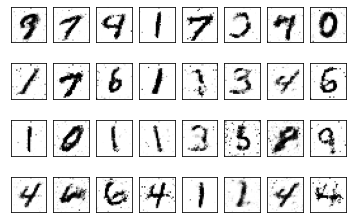

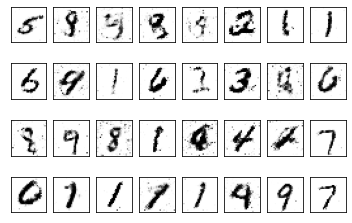

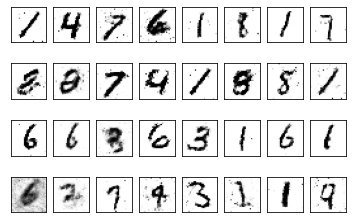

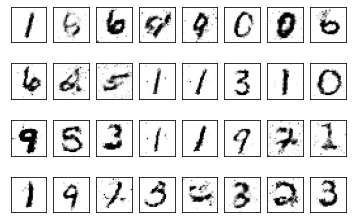

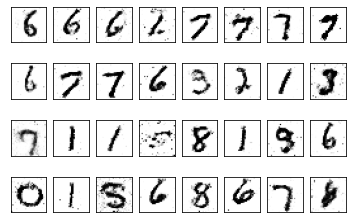

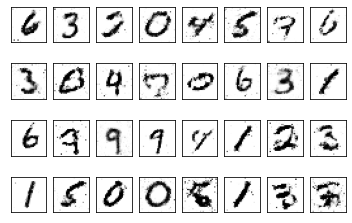

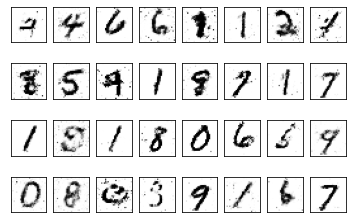

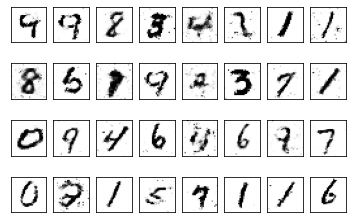

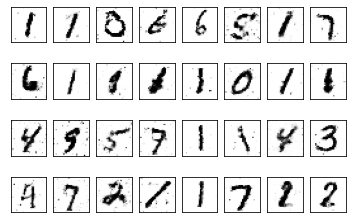

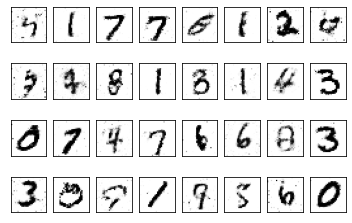

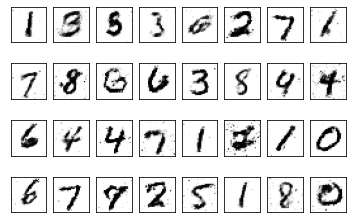

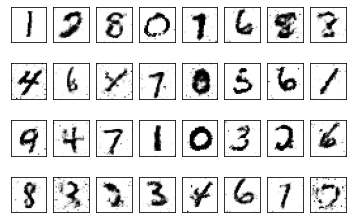

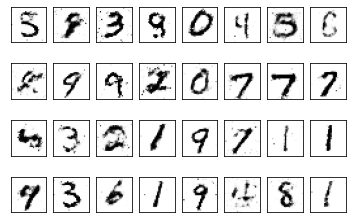

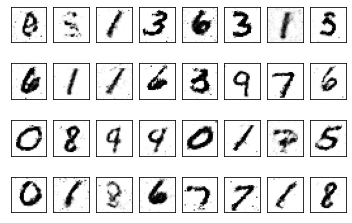

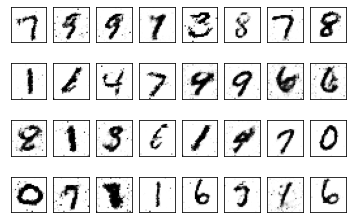

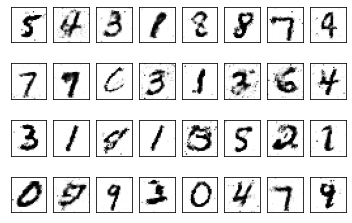

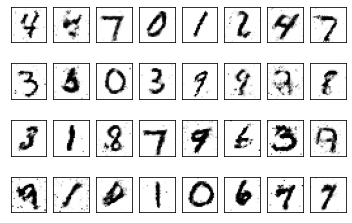

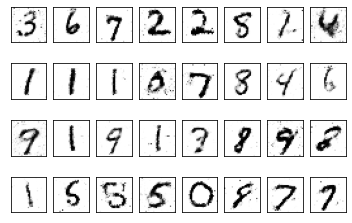

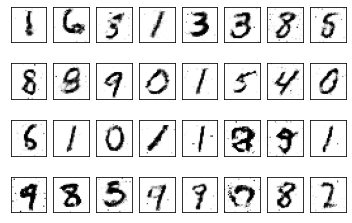

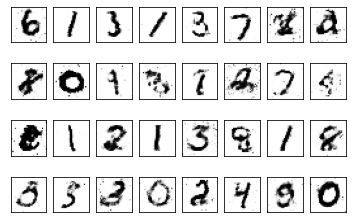

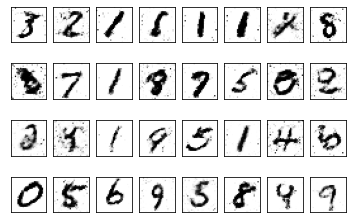

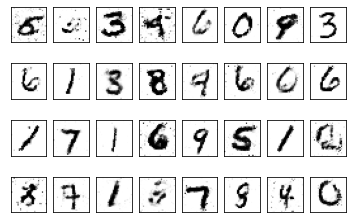

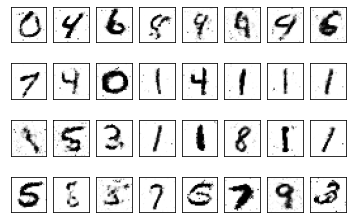

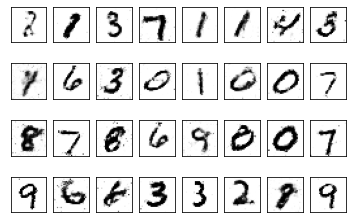

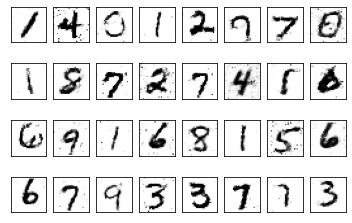

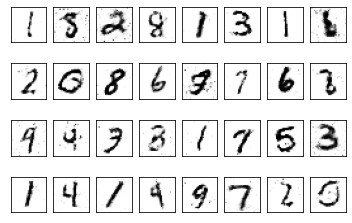

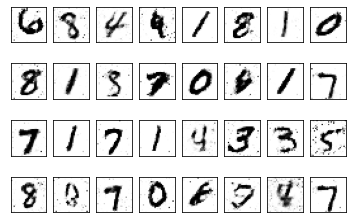

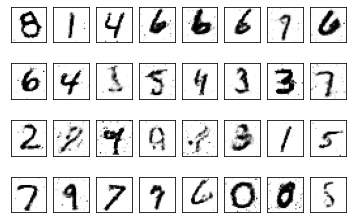

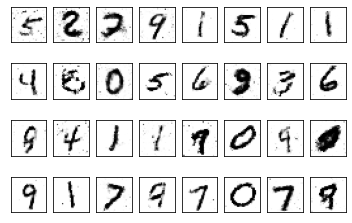

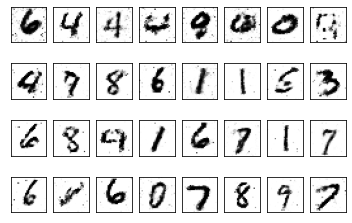

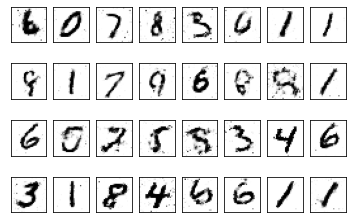

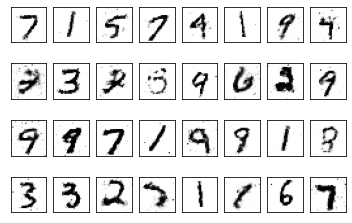

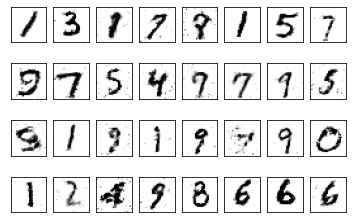

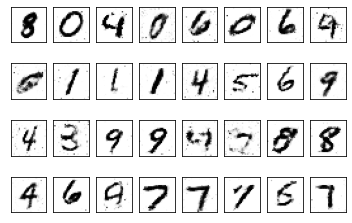

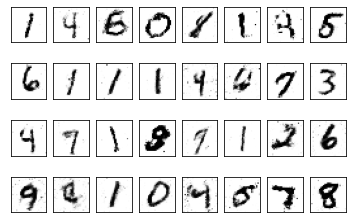

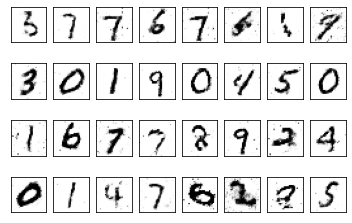

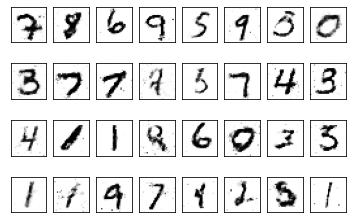

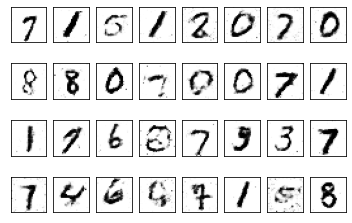

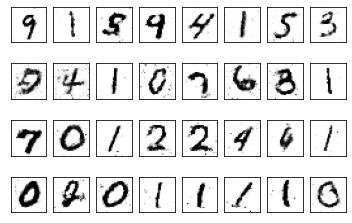

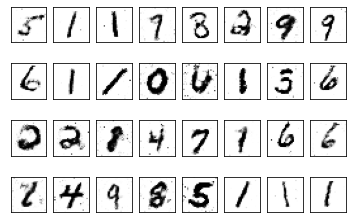

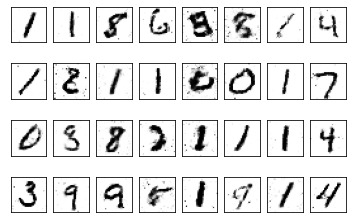

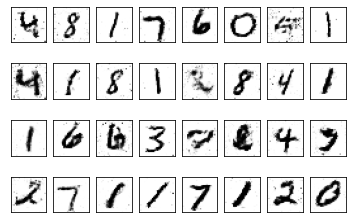

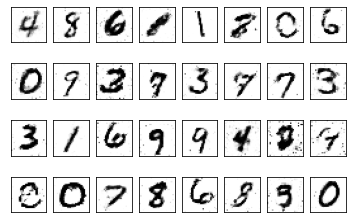

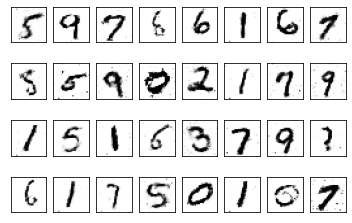

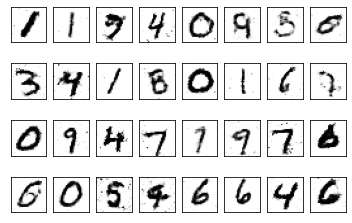

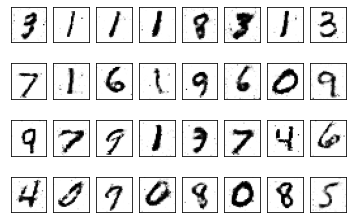

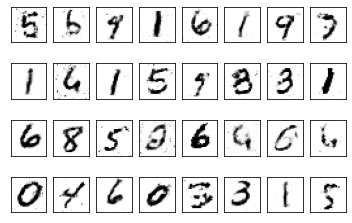

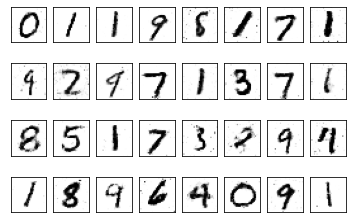

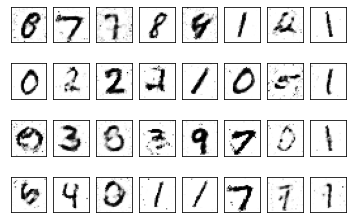

done


In [6]:

lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

gan.prepareTrainSet(batch_size,train_set)
gan.setParams(lr,num_epochs,loss_function)
gan.prepareOptimizer()

disc_path = "disc.torch"
gen_path = "gen.torch"

print(f"load discriminator: {gan.loadDisc(disc_path)}")
print(f"load generator: {gan.loadGen(gen_path)}")

while not gan.finished():
    results = gan.trainStep(0,100)
        
    plt.figure(1)
    plt.clf()
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(results[i].reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])
    plt.show()

gan.saveDisc("disc.torch")
gan.saveGen("gen.torch")

print("done")

### Check the generator

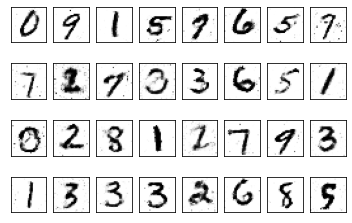

In [7]:

generated_samples = gan.generate(batch_size,100)

for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])
